# Analisis Prediktif : Prediksi tanaman yang paling cocok untuk ditanam di pertanian

oleh : ***Achmad Dino Saputra***

## Proyek Submission 1 - Machine Learning Terapan Dicoding


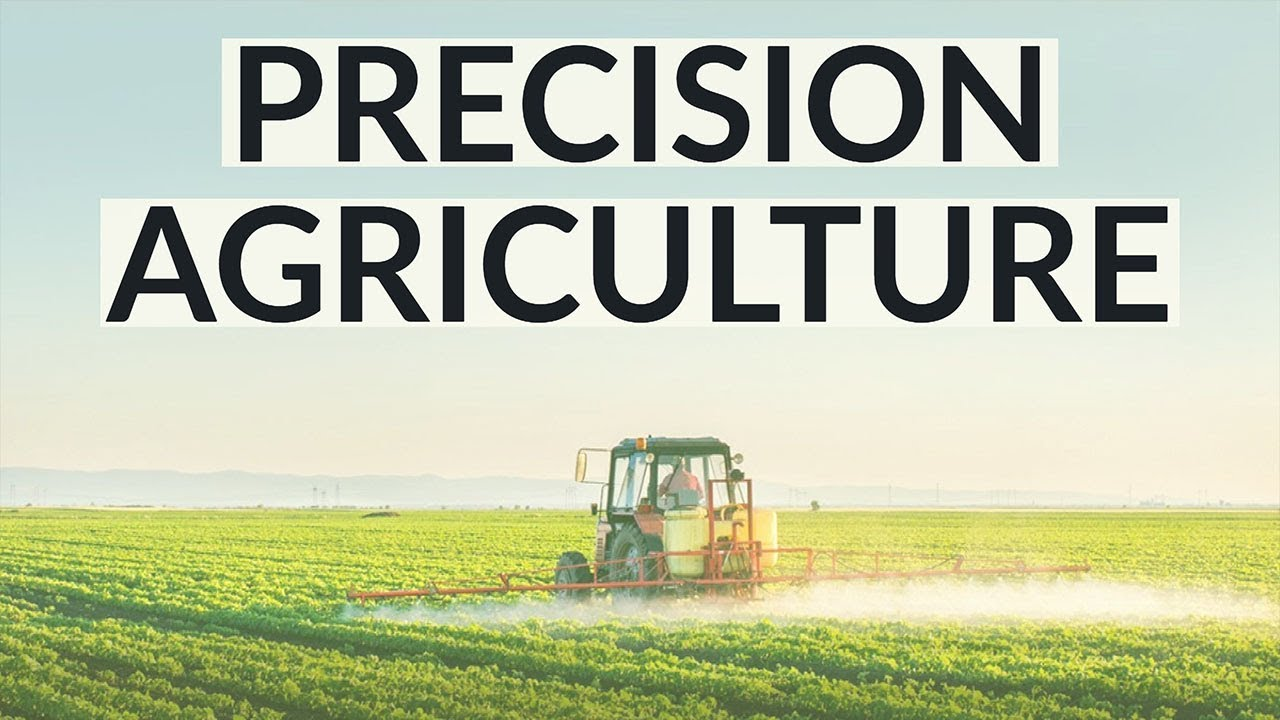

## Pendahuluan
Pada proyek ini, topik yang dibahas adalah mengenai pertanian yang di buat untuk memprediksi tanaman yang cocok ditanam untuk pertanian. Proyek ini dibuat untuk proyek Submission 1 - Machine Learning Terapan Dicoding.

# 1. Import library

In [1]:
# mengolah data
import pandas as pd
import zipfile
import os
import random

# visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# untuk mempersiapkan data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# untuk membuat model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# untuk melihat metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# 2. Mempersiapkan Dataset

In [2]:
# setting akun kaggle
os.environ['KAGGLE_USERNAME'] = 'daynos'
os.environ['KAGGLE_KEY'] = '25455a734110ce4a3df29787d5c1b365'

In [3]:
# install lib kaggle
!pip install kaggle

In [4]:
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 23.0MB/s]


In [5]:
# melakukan extract file zip dataset
local_zip = '/content/crop-recommendation-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# 3. Pemahaman Data (Data Understanding)

## 3.1 Membuat dataframe dari csv

In [6]:
# read dataset
df = pd.read_csv('Crop_recommendation.csv')
df = df.sort_values(by='label')
df

,N,P,K,temperature,humidity,ph,rainfall,label
1524,29,144,204,22.433245,92.486677,5.800449,119.102519,apple
1526,13,144,197,22.921571,94.896134,6.280223,105.694154,apple
1527,25,143,198,22.812125,91.518617,6.027314,107.855225,apple
1528,9,137,200,21.121521,90.687877,5.636687,102.801720,apple
1529,6,144,198,21.114787,90.315287,5.559364,104.508662,apple
...,...,...,...,...,...,...,...,...
1370,97,22,50,26.260287,86.145859,6.769894,58.978788,watermelon
1371,117,30,50,24.901239,87.207729,6.744966,46.592073,watermelon
1372,90,14,52,24.847408,89.204546,6.391858,59.679272,watermelon
1362,111,6,53,26.493065,88.591431,6.313513,46.063822,watermelon


## 3.2 Melihat informasi dari dataset

In [7]:
# cek label unique
df['label'].unique()

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

melihat column value dari kolom target

In [8]:
list_label = df['label'].unique().tolist()
list_label

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [9]:
df['label'].value_counts()

mango          100
papaya         100
kidneybeans    100
coconut        100
jute           100
blackgram      100
mothbeans      100
orange         100
pigeonpeas     100
watermelon     100
rice           100
muskmelon      100
coffee         100
lentil         100
pomegranate    100
grapes         100
chickpea       100
mungbean       100
banana         100
maize          100
cotton         100
apple          100
Name: label, dtype: int64

Karena data terdistribusi dengan baik, maka tidak dilakukan penyeimbangan data pada Data Preparation (Persiapan Data)

In [10]:
# melihat informasi singkat mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 1524 to 1399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 154.7+ KB


info() digunakan untuk melihat info dari dataframe seperti tipe data jumlah baris dan juga jumlah column

In [11]:
# melihat deskripsi dari data
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


describe() digunakan untuk melihat info mengenai mean, std, nilai max, nilai min, dan lain-lain pada setiap column

minimal Pada column N yaitu 0, itu bukan berarti nilai tersebut kosong, akan tetapi memang beberapa jenis tanah memang tidak terdapat nitrogen. nilai ph pada dataframe juga memiliki range yang wajar yaitu 3-9

In [12]:
# mengecek missing values
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

isna().sum() digunakan untuk melihat jumlah nilai yang null pada setiap columnnya. Setelah dilakukan pengecekan tidak terdapat missing values, maka kita tidak perlu melakukan pembersihan atau pengisian data pada missing values pada bagian Data preparation (Persiapan Data)

## 3.3 Melihat informasi data melalui Visualisasi

**Deteksi outlier** menggunakan boxplot

Pada tahap ini saya melakukan boxplot pada column, akan tetapi saya tidak menggunakan seluruh baris, melainkan menggunakan pada setiap label, karena jika saya menggunakan seluruh baris dalam boxplot pasti terdapat outlier, karena setiap label pasti memiliki values fitur mereka masing-masing, jadi saya menentukan outlier berdasarkan target label bukan berdasar seluruh label.

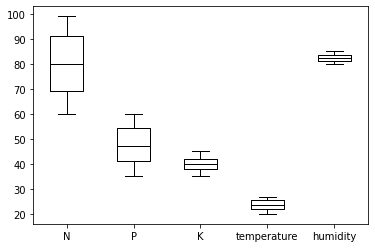

In [13]:
# boxplot mengecek outlier
df_data = df.loc[df['label']=='rice']
df_data.boxplot(column=['N', 'P', 'K','temperature','humidity'], grid=False, color='black')

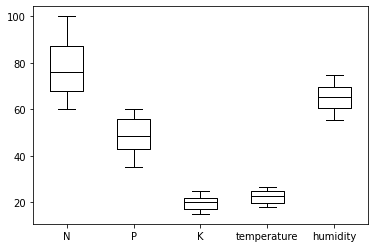

In [14]:
df_data = df.loc[df['label']=='maize']
df_data.boxplot(column=['N', 'P', 'K','temperature','humidity'], grid=False, color='black')

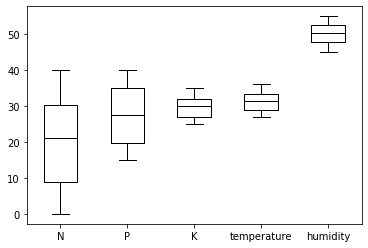

In [15]:
df_data = df.loc[df['label']=='mango']
df_data.boxplot(column=['N', 'P', 'K','temperature','humidity'], grid=False, color='black')

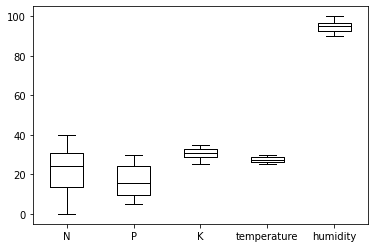

In [16]:
df_data = df.loc[df['label']=='coconut']
df_data.boxplot(column=['N', 'P', 'K','temperature','humidity'], grid=False, color='black')

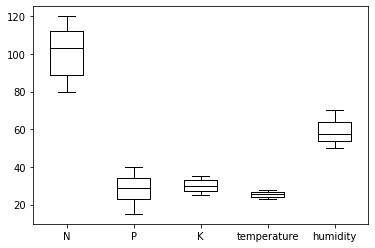

In [17]:
df_data = df.loc[df['label']=='coffee']
df_data.boxplot(column=['N', 'P', 'K','temperature','humidity'], grid=False, color='black')

Dari beberapa boxplot diatas, tidak terdapat outlier, maka saya tidak akan melakukan removal outlier.

Text(0.5, 1.0, 'Correlation Matrix fitur Numerik')

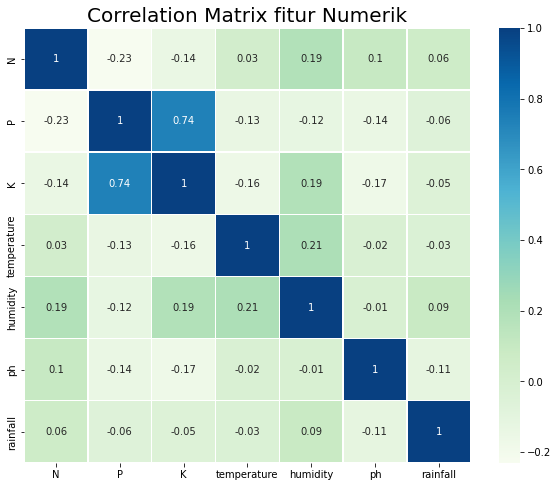

In [18]:
# melihat korelasi matrix antara kolom
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='GnBu', linewidths=0.5, )
plt.title("Correlation Matrix fitur Numerik", size=20)

* kolom P (Phosphorous) & kolom K (Potassium) memiliki korelasi 73%
* Ada juga sedikit korelasi antara kolom temperature & kolom humidity
* Sebenarnya jika ada 2 kolom berkorelasi kita bisa menggunakan satu kolom saja, akan tetapi karna fitur yang ada sangat sedikit, dan juga tidak terlalu berkorelasi sekali, maka tidak ada penghilangan korelasi.
* untuk sisa kolom yang lain sangat tidak berkolerasi dan kita bisa mempertahankannya.

# 4. Persiapan Data (Data Preparation)

## 4.1 Melakukan Label encoder untuk target

In [19]:
# melakukan encoder
label_list = df['label']
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit_transform(df['label'])
df['label'] = label_encoder.transform(df['label'])
df

,N,P,K,temperature,humidity,ph,rainfall,label
1524,29,144,204,22.433245,92.486677,5.800449,119.102519,0
1526,13,144,197,22.921571,94.896134,6.280223,105.694154,0
1527,25,143,198,22.812125,91.518617,6.027314,107.855225,0
1528,9,137,200,21.121521,90.687877,5.636687,102.801720,0
1529,6,144,198,21.114787,90.315287,5.559364,104.508662,0
...,...,...,...,...,...,...,...,...
1370,97,22,50,26.260287,86.145859,6.769894,58.978788,21
1371,117,30,50,24.901239,87.207729,6.744966,46.592073,21
1372,90,14,52,24.847408,89.204546,6.391858,59.679272,21
1362,111,6,53,26.493065,88.591431,6.313513,46.063822,21


## **4.2** Melakukan pembagian data pada dataset dengan train_test_split


In [20]:
# pembagian dataset untuk input dan target
X = df.drop(['label'], axis=1).values
y = df['label'].values
X

array([[ 29.        , 144.        , 204.        , ...,  92.48667725,
          5.80044895, 119.1025189 ],
       [ 13.        , 144.        , 197.        , ...,  94.89613443,
          6.28022267, 105.6941544 ],
       [ 25.        , 143.        , 198.        , ...,  91.51861705,
          6.0273144 , 107.855225  ],
       ...,
       [ 90.        ,  14.        ,  52.        , ...,  89.20454622,
          6.39185843,  59.67927244],
       [111.        ,   6.        ,  53.        , ...,  88.59143088,
          6.313513  ,  46.06382209],
       [120.        ,  24.        ,  47.        , ...,  89.4138489 ,
          6.26083896,  58.54876687]])

In [21]:
y

array([ 0,  0,  0, ..., 21, 21, 21])

In [22]:
#pembagian data menggunakan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# mencetak jumlah baris dan kolom pada data
print(X_train.shape)
print(X_test.shape)

(1760, 7)
(440, 7)


## **4.3** Standarisasi nilai data pada fitur numerik dengan StandardScaler


In [24]:
# melakukan standarisasi
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
print(X_train[:5], "\n")
print(X_test[:5])

[[-1.11917514 -1.27008859 -0.79302027 -0.14054187  1.02271943  0.10536971
   0.16492859]
 [-0.31058676  2.59495832  3.01259865  3.06059179  0.42051465 -1.21972108
  -0.63224539]
 [ 0.49800162 -0.18304415 -0.16203682 -0.04012318  0.2053653  -0.45248521
   1.49776392]
 [-0.98441041  0.69263054 -0.55640147  0.6829691  -0.43114077  0.73360656
  -1.22770727]
 [ 1.22573116 -0.21323983 -0.51696501 -0.9788583  -0.12064076  0.02827594
  -0.67655296]] 

[[-0.44535149 -0.18304415 -0.57611971  0.34071662  0.62003041  0.11779651
  -0.91966866]
 [-0.41839854 -0.45480526 -0.57611971 -0.04881613 -0.38271643  3.42511064
  -1.29781787]
 [ 0.22847216 -0.18304415  0.09430021  1.42871958  0.89085406  0.48424075
  -1.02845897]
 [ 0.01284859  0.11891264  0.13373667 -0.17068561  0.83165367  0.25769816
   0.10258387]
 [ 1.27963705 -0.81715341  0.01542728  0.33613453  0.84903592 -0.45245389
  -1.46830909]]


# 5. Pembuatan Model (Modelling)

## **5.1** Membuat Model Baseline dengan Support Vector Machine

In [26]:
# Pembuatan model baseline

baseline_model = SVC()
baseline_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
# Pengujian model terhadap data test
y_pred_baseline = baseline_model.predict(X_test)

In [28]:
# Laporan hasil klasifikasi model baseline
baseline_report = classification_report(y_test, y_pred_baseline, output_dict=True, target_names=list_label)
pd.DataFrame(baseline_report).transpose()

,precision,recall,f1-score,support
apple,1.000000,1.000000,1.000000,19.000
banana,1.000000,1.000000,1.000000,21.000
blackgram,1.000000,0.961538,0.980392,26.000
chickpea,1.000000,1.000000,1.000000,20.000
coconut,1.000000,1.000000,1.000000,23.000
coffee,1.000000,1.000000,1.000000,24.000
cotton,0.950000,1.000000,0.974359,19.000
grapes,1.000000,1.000000,1.000000,20.000
jute,0.611111,1.000000,0.758621,11.000
kidneybeans,1.000000,1.000000,1.000000,23.000


In [29]:
# menampilkan akurasi
accuracy_score(y_test, y_pred_baseline)

0.975

In [30]:
# Menampung hasil confusion matrix pada baseline model
baseline_cm = confusion_matrix(y_test, y_pred_baseline)

## **5.2** Improvement model dengan menggunakan teknik GridSearch untuk mendapatkan hyper parameter terbaik

In [31]:
# model dengan hyperparameter yaitu kernel, C, gamma
param_grid = {
    'kernel': ['rbf', 'linear', 'sigmoid'],
    'C':     [1, 10, 100, 1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}

In [32]:
# mencari parameter terbaik dengan GridSearchCV
grid_search = GridSearchCV(baseline_model, param_grid)

# melatih model dengan fungsi fit
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.05, 'kernel': 'rbf'}


In [34]:
# melatih best model hasil GridSearchCV
best_model = SVC(C=100, gamma=0.05, kernel='rbf')
best_model.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
y_pred_grid = best_model.predict(X_test)

In [36]:
# Laporan hasil klasifikasi model baseline dengan hyper parameter
base_model_report = classification_report(y_test, y_pred_grid, output_dict=True, target_names=list_label)
pd.DataFrame(base_model_report).transpose()

,precision,recall,f1-score,support
apple,1.000000,1.000000,1.000000,19.000000
banana,1.000000,1.000000,1.000000,21.000000
blackgram,1.000000,1.000000,1.000000,26.000000
chickpea,1.000000,1.000000,1.000000,20.000000
coconut,1.000000,1.000000,1.000000,23.000000
coffee,1.000000,0.958333,0.978723,24.000000
cotton,1.000000,1.000000,1.000000,19.000000
grapes,1.000000,1.000000,1.000000,20.000000
jute,0.666667,0.909091,0.769231,11.000000
kidneybeans,1.000000,1.000000,1.000000,23.000000


In [37]:
# menampilkan akurasi model yang sudah diimprove
accuracy_score(y_test, y_pred_grid)

0.9863636363636363

In [38]:
# menampung hasil confusion matrix yang sudah melalui GridSearchCV
grid_cm = confusion_matrix(y_test, y_pred_grid)

# 6. Evaluasi Model

## 6.1 Confusion Matrix model baseline


In [39]:
cm_df = pd.DataFrame(baseline_cm,
                     index=list_label,
                     columns=list_label)

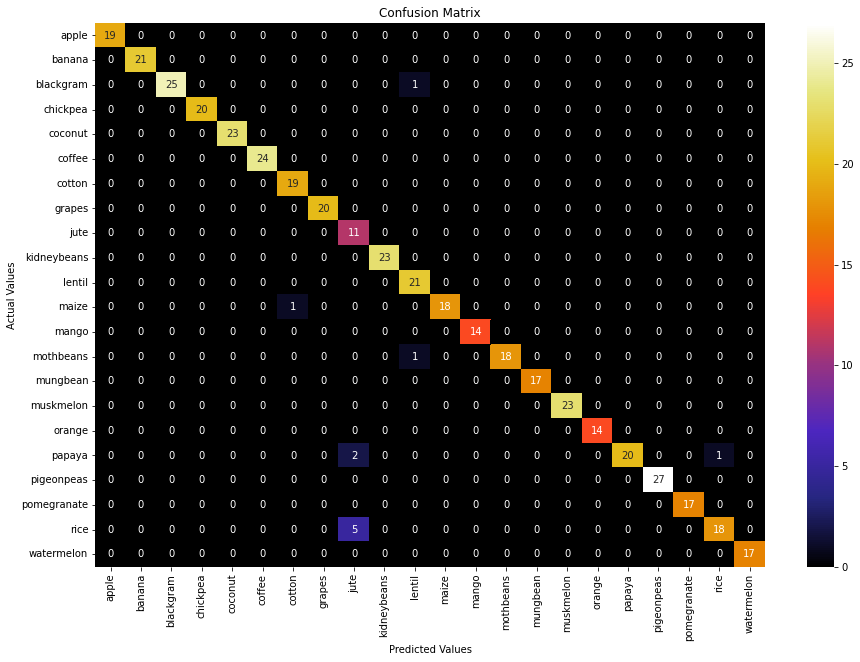

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True, cmap='CMRmap')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## 6.2 Confusion Matrix model yang dikembangkan (Improvement)


In [41]:
cm_df_grid = pd.DataFrame(grid_cm,
                          index=list_label,
                          columns=list_label)

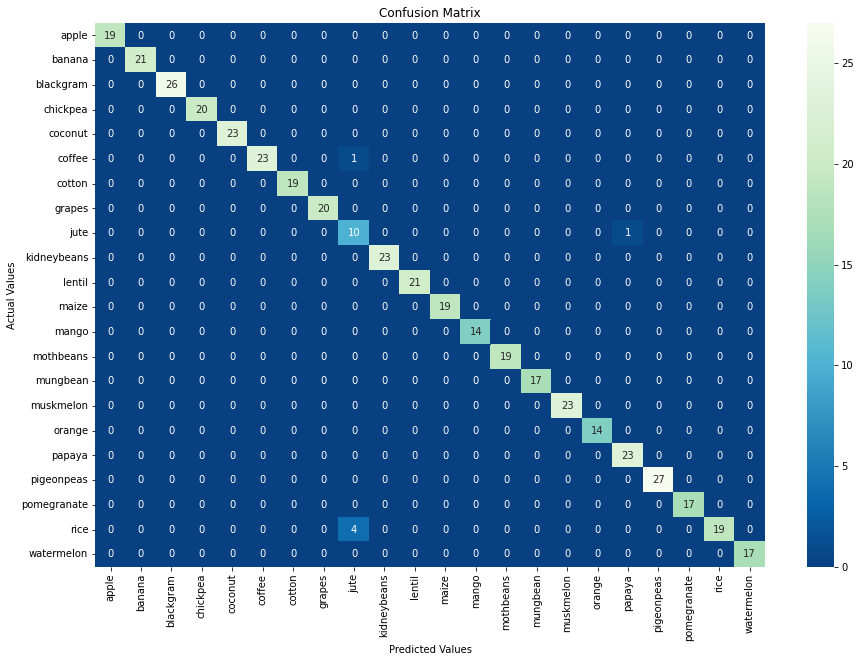

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(cm_df_grid, annot=True, cmap='GnBu_r')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Tidak ada perbedaan yang terlalu signifikan pada hasil akurasi, kedua model masih kurang dalam memprediksi target "jute". Tapi keseluruhan akurasi sudah baik karena dengan SVM jenis masalah pengklasifikasian seperti ini sangat cocok, sehingga dengan menggunakan baseline model sudah mendapatkan akurasi yang cukup. Penggunaan hyper parameter dapat menambah tingkat akurasi lebih baik lagi.

# Penutupan

Model untuk prediksi jenis tanaman yang akan ditanam oleh manusia telah selesai. Model ini dapat digunakan untuk permasalahan sebenernya. Namun beberapa pengembanagan dapat dilakukan seperti meningkatkan prediksi jenis tanaman "jute" karena jenis tanaman ini mirip seperti "rice" sehingga banyak beberapa prediksi meleset, kemudian untuk meningkatkan accuracy dapat menggunakan algoritma lain seperti RandomForest, DecisionTree atau bisa menggunakan Deep learning.

### *Referensi*

* Dokumentasi Scikit-learn : https://scikit-learn.org/stable/modules/classes.html
* Dokumentasi Seaborn : https://seaborn.pydata.org/tutorial.html
* Dokumentasi Matplot : https://matplotlib.org/
* Lainnya :

  https://www.kaggle.com/atharvaingle/crop-recommendation-dataset